# Relevant vectors in 2D lattices

In this notebook, we demonstrate the relevant vectors for several 2D lattices, including the square, rectangular and triangular lattices. 

For a $n$-dimensional lattice $\Lambda$, the [relevant vectors](https://publications.lib.chalmers.se/records/fulltext/14990/local_14990.pdf) is a minimal set of lattice vectors $N(\Lambda)\in\Lambda$ such that the Voronoi cell for the origin can be written as
\begin{align}
\Omega(\Lambda, {\bf 0}) \equiv \left\{{\bf x}\in \mathbb{R}^n: ||{\bf x}||\leq ||{\bf x-c}||, \forall {\bf c}\in N(\Lambda)\right\}.
\end{align}
Finding the relevant vectors for a lattice can also be reduced to finding the closest point of the lattice, as explained in [Agrell et. al.](https://publications.lib.chalmers.se/records/fulltext/14990/local_14990.pdf).

In [9]:
using LatticeAlgorithms
using Plots
using LinearAlgebra

function voronoi_cell_parallelogram(
        λ, 
        δ, 
        θ, 
        name; 
        v1 = [1 0], 
        xlim = 10, 
        ylim = 10, 
        Nx = 100, 
        Ny = 100
    )
    """Plot the Voronoi cell for a 2D lattice with basis vectors forming a parallelogram
    
    Args:
        λ: lattice constant
        δ: ratio between the length of basis vectors v1 and v2
        θ: angle between the two basis vectors
        v1 = [1 0]: The basis vector v1
        xlim = 10: The x-axis of the plot ranges from -xlim to xlim
        ylim = 10: The y-axis of the plot ranges from -ylim to ylim
        Nx = 100: Number of sampling points along the x-axis
        Ny = 100: Number of sampling points along the y-axis
    """

    v2 = δ * [cos(θ) sin(θ)] * norm(v1) # basis vector v2
    M = λ * [v1 ; v2] # generator matrix 

    xrange = range(-xlim, xlim, Nx)
    yrange = range(-ylim, ylim, Ny)

    decoder = zeros(length(xrange), length(yrange))
    for i in 1 : length(xrange)
        for j in 1 : length(yrange)
            x = [xrange[i], yrange[j]]
            x_hat = closest_point(x, M)
            u_hat = round.(Int, inv(transpose(M)) * x_hat)
            
            if mod(u_hat[1], 2) == 0 && mod(u_hat[2], 2) == 0 
                decoder[i, j] = 0 # I
            elseif mod(u_hat[1], 2) == 0 && mod(u_hat[2], 2) == 1
                decoder[i, j] = 1 # Z
            elseif mod(u_hat[1], 2) == 1 && mod(u_hat[2], 2) == 0
                decoder[i, j] = 2 # X
            elseif mod(u_hat[1], 2) == 1 && mod(u_hat[2], 2) == 1
                decoder[i, j] = 3 # Y
            end
        end
    end
    decoder = transpose(decoder)

    pts = get_grid_points_2D_lattice(M, xlim, ylim)

    g = heatmap(xrange, yrange, decoder, c=:viridis)
    scatter!([pt[1] for pt in pts], [pt[2] for pt in pts], markercolor=:red, aspect_ratio=:equal, legend=false)
    xlims!((-xlim, xlim))
    ylims!((-ylim, ylim))

    return g
end

function relevant_vectors_parallelogram(λ, δ, θ, name; v1 = [1 0], xlim = 10, ylim = 10, Nx = 100, Ny = 100)
    """Find the relevant vectors in a parallelogram
    
    Args:
        x: The given vector
        λ: lattice constant
        δ: ratio between the length of basis vector v2 and v1 
        θ: angle between the two basis vectors
        v1 = [1 0]: The basis vector v1    
        xlim = 10: The x-axis of the plot ranges from -xlim to xlim
        ylim = 10: The y-axis of the plot ranges from -ylim to ylim
        Nx = 100: Number of sampling points along the x-axis
        Ny = 100: Number of sampling points along the y-axis    
    """
    
    v2 = δ * [cos(θ) sin(θ)] # basis vector v2
    M = λ * [v1 ; v2] # generator matrix 
    
    Ntil = relevant_vectors(M)
    println(Ntil)
    
    g = voronoi_cell_parallelogram(λ, δ, θ, name; v1 = v1, xlim = xlim, ylim = ylim, Nx = Nx, Ny = Ny)
        

    for pt in Ntil
        plot!([0, pt[1]], [0, pt[2]], lw=3)
        plot!([0, -pt[1]], [0, -pt[2]], lw=3)        
    end
    xlims!((-xlim, xlim))
    ylims!((-ylim, ylim))
  
    return g    
    
end

relevant_vectors_parallelogram (generic function with 1 method)

## Square lattice

Any[[-6.123233995736766e-17, -1.0], [-1.0, 0.0]]


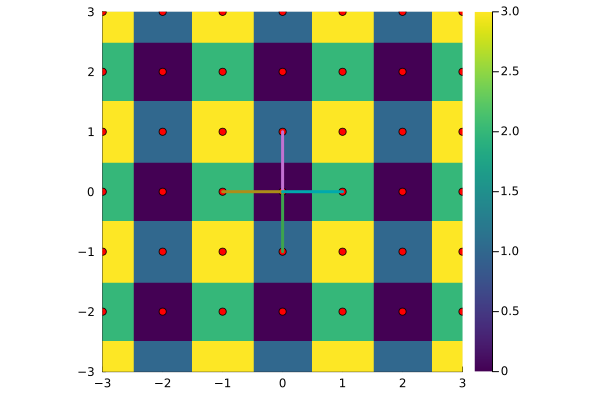

In [10]:
relevant_vectors_parallelogram(1, 1, π/2, "square", xlim=3, ylim=3)

## Rectangular lattice

Any[[-1.2246467991473532e-16, -2.0], [-1.0, 0.0]]


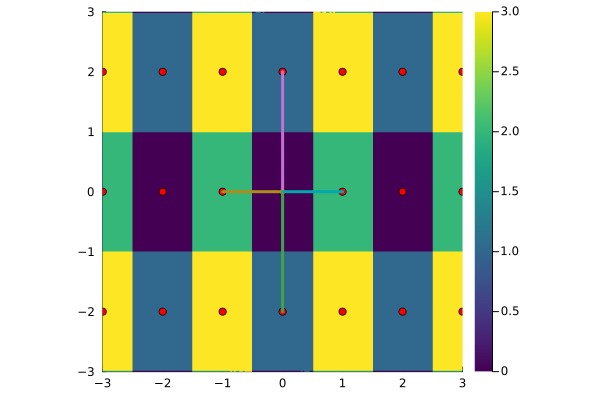

In [11]:
relevant_vectors_parallelogram(1, 2, π/2, "rectangular", xlim=3, ylim=3, Nx=200, Ny=200)

## Triangular lattice


Any[[-0.5000000000000001, -0.8660254037844386], [-1.0, 0.0], [0.5, -0.8660254037844386]]


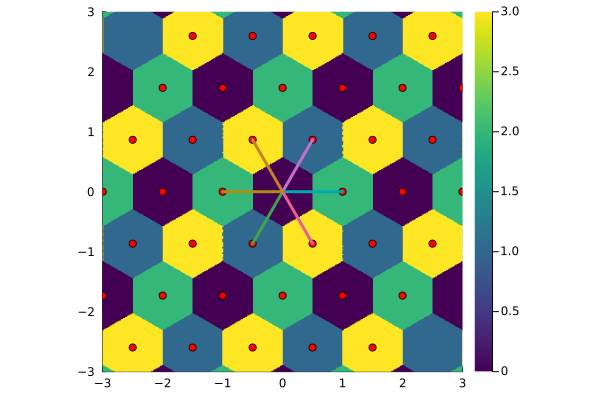

In [12]:
relevant_vectors_parallelogram(1, 1, π/3, "triangular", xlim=3, ylim=3, Nx=400, Ny=400)

## General parallelogram

Any[[-0.43301270189221935, -0.24999999999999997], [-0.1339745962155613, 0.49999999999999994], [-0.5669872981077807, 0.24999999999999997]]


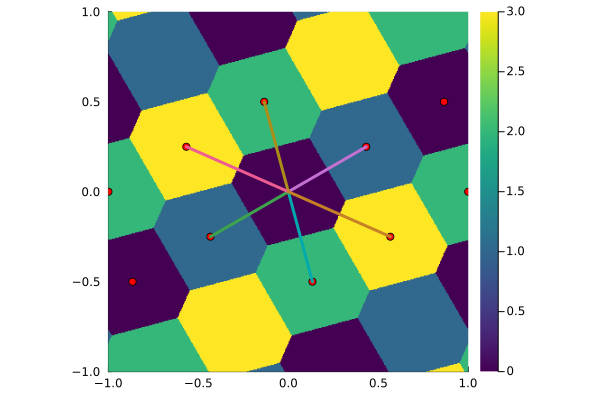

In [13]:
relevant_vectors_parallelogram(1, 0.5, π/6, "general_parallelogram_1", xlim=1, ylim=1, Nx=400, Ny=400)